In [1]:
# Import packages

import numpy as np

import tensorflow as tf

# import wf_psf.SimPSFToolkit as SimPSFToolkit
from wf_psf.sims.psf_simulator import PSFSimulator
import wf_psf.utils as wf_utils
# import wf_psf.tf_psf_field as tf_psf_field
import wf_psf.psf_models.tf_psf_field as tf_psf_field
# from wf_psf.psf_models.zernikes import zernike_generator
from wf_psf.psf_models.psf_models import generate_zernike_maps_3d
from wf_psf.psf_models.psf_model_parametric import TFParametricPSFFieldModel
from wf_psf.utils.utils import generate_SED_elems_in_tensorflow



# Plot style & colormap
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import ImageGrid

# Pre-defined colormap
top = mpl.colormaps['Oranges_r'].resampled(128)
bottom = mpl.colormaps['Blues'].resampled(128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

/Users/ec270266/anaconda3/envs/wavediff/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
save_dir = './../plots/'
plot_results = True

repo_dir = "./../../../"

# papers/phase_retrieval_2024/data/paper_output_v1/dataset/train_Euclid_res_2000_TrainStars_id_010_8_bins.npy

star_cat = np.load(
    repo_dir + "papers/phase_retrieval_2024/data/paper_output_v1/dataset/train_Euclid_res_2000_TrainStars_id_010_8_bins.npy",
    allow_pickle=True
)[()]

In [3]:
args = {
    'id_name': '_wf_PR_NewPRoj_12_cycles_v2' ,
    'suffix_id_name': 'v2' ,
    'base_id_name': '_wf_PR_NewPRoj_12_cycles_' ,
    'eval_only_param': False ,
    'total_cycles': 12 ,
    'saved_cycle': 'cycle12' ,
    'reset_dd_features': True ,
    'eval_only_param': False ,
    'project_dd_features': True ,
    'd_max': 2 ,
    'n_zernikes': 45 ,
    'save_all_cycles': True ,
    'n_bins_lda': 8,
    'n_bins_gt': 8,
    'output_dim': 32,
    'batch_size': 32,
    'oversampling_rate': 3.,
    'output_q': 3.,
    'sed_sigma': 0.,
    'x_lims': [0, 1e3],
    'y_lims': [0, 1e3],
    'sed_interp_kind': 'linear',
    'interp_pts_per_bin': 0,
    'extrapolate': True,
    'opt_stars_rel_pix_rmse': True ,
    'eval_mono_metric_rmse': False,
    'eval_opd_metric_rmse': True,
    'eval_train_shape_sr_metric_rmse': True,
    'pupil_diameter': 256 ,
    'n_epochs_param_multi_cycle': "0" ,
    'n_epochs_non_param_multi_cycle': "75" ,
    'l_rate_non_param_multi_cycle': "0.1" ,
    'l_rate_param_multi_cycle': "0" ,
    'l_rate_param': None,
    'l_rate_non_param': None,
    'n_epochs_param': None,
    'n_epochs_non_param': None,
    'model': 'poly' ,
    'model_eval': 'poly' ,
    'cycle_def': 'complete' ,
    'gt_n_zernikes': 45 ,
    'd_max_nonparam': 5 ,
    'saved_model_type': 'external' ,
    'use_sample_weights': True ,
    'l2_param': 0. ,
    'interpolation_type': 'none' ,
    'eval_batch_size': 16 ,
    'train_opt': True ,
    'eval_opt': True ,
    'plot_opt': True ,
    'dataset_folder': '.',
    'test_dataset_file': 'test_Euclid_res_id_010_8_bins.npy',
    'train_dataset_file': 'train_Euclid_res_2000_TrainStars_id_010_8_bins.npy',
    'base_path': '.',
    'metric_base_path': '.',
    'chkp_save_path': '.',
    'plots_folder': 'plots/' ,
    'model_folder': 'chkp/' ,
    'log_folder': 'log-files/' ,
    'optim_hist_folder': 'optim-hist/' ,
    'star_numbers': 1 ,
}

In [4]:
# simPSF_np = PSFSimulator(
#     # zernikes,
#     max_order=args['n_zernikes'],
#     pupil_diameter=args['pupil_diameter'],
#     output_dim=args['output_dim'],
#     oversampling_rate=args['oversampling_rate'],
#     output_Q=args['output_q']
# )

# simPSF_np.gen_random_Z_coeffs(max_order=args['n_zernikes'])
# z_coeffs = simPSF_np.normalize_zernikes(simPSF_np.get_z_coeffs(), simPSF_np.max_wfe_rms)
# simPSF_np.set_z_coeffs(z_coeffs)
# simPSF_np.generate_mono_PSF(lambda_obs=0.7, regen_sample=False)

# # Obscurations
# obscurations = simPSF_np.generate_euclid_pupil_obscurations(N_pix=args['pupil_diameter'], N_filter=2)
# tf_obscurations = tf.convert_to_tensor(obscurations, dtype=tf.complex64)

In [5]:
# idx = 712
# zernike_gt = star_cat['zernike_coef'][idx]
# sed_gt = star_cat['SEDs'][idx]
# simPSF_np.set_z_coeffs(zernike_gt)
# simPSF_np.calculate_opd()
# opd_gt = simPSF_np.opd
# psf_gt = simPSF_np.generate_poly_PSF(SED=sed_gt)

# plt.figure(figsize=(12,4))
# plt.subplot(1,3,1)
# plt.bar(range(len(zernike_gt.flatten())), zernike_gt.flatten())
# plt.xlabel('Zernike Index')
# plt.ylabel('Coefficient Value')
# plt.title('Zernike Coefficients for Star idx={}'.format(idx))
# plt.subplot(1,3,2)
# plt.imshow(opd_gt, cmap=newcmp)
# plt.title('Corresponding OPD')
# plt.subplot(1,3,3)
# plt.imshow(psf_gt, cmap='gist_stern')
# plt.title('Corresponding PSF')
# plt.tight_layout()
# plt.show()


In [6]:
# wfe_rms = 1e-2

# zk_pred = np.random.randn(45)*wfe_rms
# simPSF_np.set_z_coeffs(zk_pred)
# simPSF_np.calculate_opd()
# opd_pred = simPSF_np.opd

# psf_pred = simPSF_np.generate_poly_PSF(SED=sed_gt)

# # Plot coefficients and opd
# plt.figure(figsize=(12,4))
# plt.subplot(1,3,1)
# plt.bar(range(len(zk_pred.flatten())), zk_pred.flatten())
# plt.xlabel('Zernike Index')
# plt.ylabel('Coefficient Value')
# plt.title('Random Zernike Coefficients')
# plt.subplot(1,3,2)
# plt.imshow(opd_pred, cmap=newcmp)
# plt.title('Corresponding OPD')
# plt.subplot(1,3,3)
# plt.imshow(psf_pred, cmap='gist_stern')
# plt.title('Corresponding PSF')
# plt.tight_layout()
# plt.show()


In [7]:
# psf_diff = psf_pred - psf_gt
# psf_rmse = np.sqrt(np.mean(psf_diff**2))
# psf_rmse_rel = psf_rmse / np.sqrt(np.mean(psf_gt**2))

# plt.imshow(psf_diff, cmap='gist_stern')
# plt.title('Residual, Rel RMSE={:.1f} %'.format(psf_rmse_rel*100))

# Gradient descent: WFE recovery

In [8]:
# Init simulator for SED binning
simPSF_np = PSFSimulator(
    max_order=args['n_zernikes'],
    pupil_diameter=args['pupil_diameter'],
    output_dim=args['output_dim'],
    oversampling_rate=args['oversampling_rate'],
    output_Q=args['output_q']
)

# Sed binning
sed_data = [generate_SED_elems_in_tensorflow(
        _sed, simPSF_np, n_bins=8, tf_dtype=tf.float64
    )
    for _sed in star_cat["SEDs"]
]
sed_data = tf.convert_to_tensor(sed_data, dtype=tf.float32)
sed_data = tf.transpose(sed_data, perm=[0, 2, 1])

# Obscurations
obscurations = simPSF_np.generate_euclid_pupil_obscurations(N_pix=args['pupil_diameter'], N_filter=3)
tf_obscurations = tf.convert_to_tensor(obscurations, dtype=tf.complex64)

# Zernike maps
zk_maps = generate_zernike_maps_3d(n_zernikes=args['n_zernikes'], pupil_diam=args['pupil_diameter'])

In [9]:
# Init the PSF model
psf_model = TFParametricPSFFieldModel(
    zernike_maps=zk_maps,
    obscurations=obscurations,
    batch_size=1,
    output_Q=args['output_q'],
    output_dim=args['output_dim'],
)

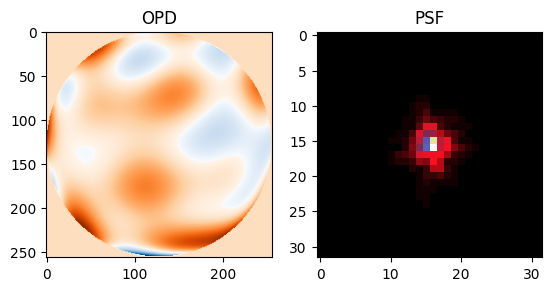

In [10]:
# Test forward pass and plot
x = tf.Variable(np.random.randn(1,45,1,1)*1e-2, dtype=tf.float32)
opd = psf_model.tf_zernike_OPD(x)
# psf_model.tf_batch_poly_PSF.current_opd = opd
fig, ax = plt.subplots(1,2)
ax[0].imshow(opd[0], cmap=newcmp); ax[0].set_title('OPD')
psf = psf_model.tf_batch_poly_PSF([opd, sed_data[:1]])
ax[1].imshow(psf[0], cmap='gist_stern'); ax[1].set_title('PSF')
plt.show()

In [30]:
def forward_model(z_coeffs, target_star_idx=77):
    opd = psf_model.tf_zernike_OPD(z_coeffs)
    psf = psf_model.tf_batch_poly_PSF([opd, sed_data[target_star_idx:target_star_idx+1]])
    return psf

# def forward_model(z_coeffs, target_star_idx=77):
#     simPSF_np.set_z_coeffs(z_coeffs)
#     simPSF_np.calculate_opd()
#     return simPSF_np.generate_poly_PSF(SED=star_cat['SEDs'][idx])

def opd_psf(z_coeffs, target_star_idx):
    opd = psf_model.tf_zernike_OPD(z_coeffs)
    psf = psf_model.tf_batch_poly_PSF([opd, sed_data[target_star_idx:target_star_idx+1]])
    return opd, psf

def loss_function(psf_gt, psf_pred):
    diff = psf_gt - psf_pred
    rmse = tf.sqrt(tf.reduce_mean(diff**2))
    rmse_rel = rmse / tf.sqrt(tf.reduce_mean(psf_gt**2))
    return rmse_rel

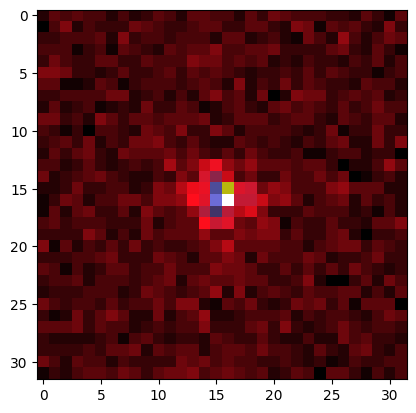

In [91]:
plt.imshow(star_cat['noisy_stars'][11], cmap='gist_stern')

In [121]:
n_iterations = 10
star_target_idx = 11
nz = 45
wfe_rms = 1e-2
lr = 0.004

psf_gt = tf.convert_to_tensor(np.expand_dims(star_cat['noisy_stars'][star_target_idx], axis=0), dtype=tf.float32)

# Initialize variable and optimizer
x = [np.random.randn(1, nz, 1, 1) * wfe_rms for _ in range(20)]
y = [forward_model(xi) for xi in x]
loss_current = [loss_function(psf_gt, yi) for yi in y]
global_best = x[np.argmin(loss_current)]

# x = tf.Variable(np.random.randn(1,nz,1,1)*wfe_rms, dtype=tf.float32)
x = tf.Variable(global_best, dtype=tf.float32)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
loss_history = []

for i in range(n_iterations):
    with tf.GradientTape() as tape:
        psf_pred = forward_model(x)
        loss = loss_function(psf_gt, psf_pred)
    grads = tape.gradient(loss, [x])
    optimizer.apply_gradients(zip(grads, [x]))
    loss_history.append(loss.numpy())

    print(f"Iteration {i}, Loss: {loss.numpy():.6f}")
    

KeyboardInterrupt: 

Text(0, 0.5, 'Loss (RMSE)')

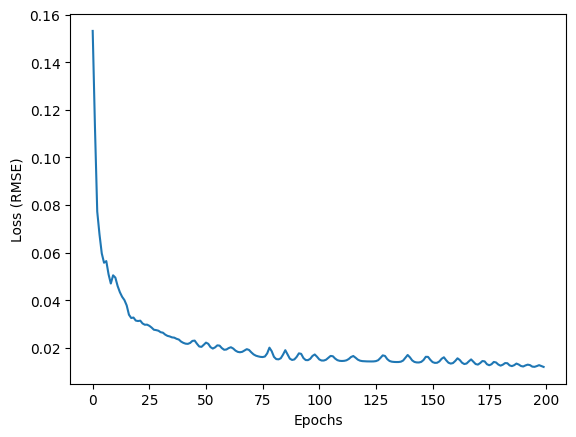

In [112]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')

In [ ]:
# np.save('sgd_loss_{}.npy'.format(star_target_idx), loss_history, allow_pickle=True)
# np.save('sgd_best_{}.npy'.format(star_target_idx), np.array(x), allow_pickle=True)

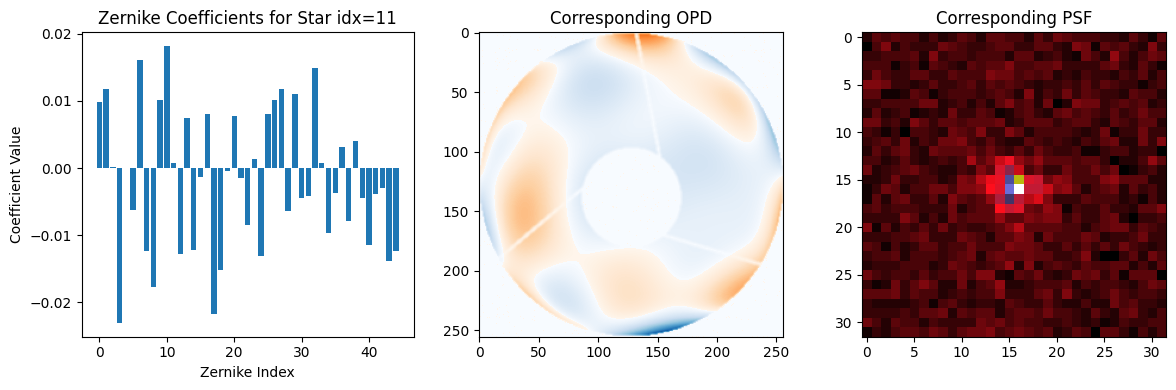

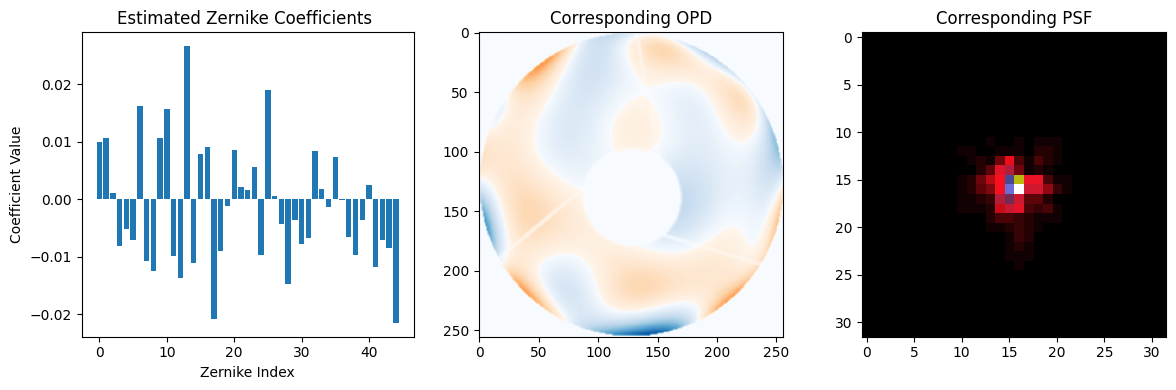

In [ ]:
opd_gt, psf_gt = opd_psf(tf.convert_to_tensor(np.reshape(star_cat['zernike_coef'][star_target_idx], (1, nz, 1, 1) )), star_target_idx)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.bar(range(nz), star_cat['zernike_coef'][star_target_idx][:,0])
plt.xlabel('Zernike Index')
plt.ylabel('Coefficient Value')
plt.title('Zernike Coefficients for Star idx={}'.format(star_target_idx))
plt.subplot(1,3,2)
plt.imshow(opd_gt[0]*obscurations, cmap=newcmp, vmin=-0.5, vmax=0.5)
plt.title('Corresponding OPD')
plt.subplot(1,3,3)
# plt.imshow(psf_gt[0], cmap='gist_stern')
plt.imshow(star_cat['stars'][star_target_idx], cmap='gist_stern')
plt.title('Corresponding PSF')
plt.tight_layout()
plt.show()

zk_pred = x.numpy()
zk_pred[0,0,0,0] = star_cat['zernike_coef'][star_target_idx][0,0]
opd_pred, psf_pred = opd_psf(zk_pred, star_target_idx)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.bar(range(nz), zk_pred[0,:,0,0])
plt.xlabel('Zernike Index')
plt.ylabel('Coefficient Value')
plt.title('Estimated Zernike Coefficients ')
plt.subplot(1,3,2)
plt.imshow(opd_pred[0]*obscurations, cmap=newcmp, vmin=-0.5, vmax=0.5)
plt.title('Corresponding OPD')
plt.subplot(1,3,3)
plt.imshow(psf_pred[0], cmap='gist_stern')
plt.title('Corresponding PSF')
plt.tight_layout()
plt.show()

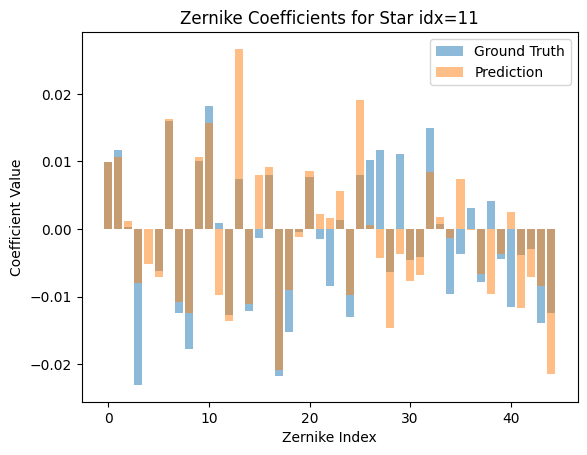

In [114]:
plt.bar(range(nz), star_cat['zernike_coef'][star_target_idx][:,0], label='Ground Truth', alpha=0.5)
plt.bar(range(nz), zk_pred[0,:,0,0], label='Prediction', alpha=0.5)
plt.legend()
plt.xlabel('Zernike Index')
plt.ylabel('Coefficient Value')
plt.title('Zernike Coefficients for Star idx={}'.format(star_target_idx))
plt.show()

In [136]:
def opd_rmse(opd_gt, opd_pred, obscurations):
    diff = (opd_gt - opd_pred) * obscurations
    rmse = tf.sqrt(tf.reduce_mean(diff**2))
    rmse_rel = rmse / tf.sqrt(tf.reduce_mean((opd_gt*obscurations)**2))
    return rmse_rel

In [137]:
# np.sqrt(np.mean((opd_pred[0]*obscurations - opd_gt[0]*obscurations)**2)) / np.sqrt(np.mean((opd_gt[0]*obscurations)**2)) * 100
opd_rmse(opd_gt, opd_pred, obscurations).numpy() * 100

108.39675664901733

# Optimise WFE directly with gradient descent

In [122]:
def forward_model_opd(opd, target_star_idx=77):
    psf = psf_model.tf_batch_poly_PSF([opd, sed_data[target_star_idx:target_star_idx+1]])
    return psf

In [206]:
n_iterations = 100
star_target_idx = 188
nz = 45
wfe_rms = 1e-2
lr = 0.03

psf_gt = tf.convert_to_tensor(np.expand_dims(star_cat['stars'][star_target_idx], axis=0), dtype=tf.float32)

# Initialize variable and optimizer

random_init = tf.random_uniform_initializer(minval=-0.001, maxval=0.001)
opd_pred = tf.Variable(
    initial_value=random_init(shape=[1, args['pupil_diameter'], args['pupil_diameter']]),
    trainable=True,
    dtype=tf.float32,
)

# x = tf.Variable(np.random.randn(1,nz,1,1)*wfe_rms, dtype=tf.float32)
# x = tf.Variable(global_best, dtype=tf.float32)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
loss_history = []

for i in range(n_iterations):
    with tf.GradientTape() as tape:
        psf_pred = forward_model_opd(opd_pred)
        loss = loss_function(psf_gt, psf_pred)
    grads = tape.gradient(loss, [opd_pred])
    optimizer.apply_gradients(zip(grads, [opd_pred]))
    loss_history.append(loss.numpy())

    print(f"Iteration {i}, Loss: {loss.numpy():.6f}")

Iteration 0, Loss: 0.352687
Iteration 1, Loss: 0.315324
Iteration 2, Loss: 0.267728
Iteration 3, Loss: 0.164981
Iteration 4, Loss: 0.144479
Iteration 5, Loss: 0.169658
Iteration 6, Loss: 0.173251
Iteration 7, Loss: 0.151328
Iteration 8, Loss: 0.128284
Iteration 9, Loss: 0.112487
Iteration 10, Loss: 0.087076
Iteration 11, Loss: 0.092649
Iteration 12, Loss: 0.105602
Iteration 13, Loss: 0.091730
Iteration 14, Loss: 0.066825
Iteration 15, Loss: 0.072195
Iteration 16, Loss: 0.080294
Iteration 17, Loss: 0.066537
Iteration 18, Loss: 0.050964
Iteration 19, Loss: 0.052103
Iteration 20, Loss: 0.054693
Iteration 21, Loss: 0.054244
Iteration 22, Loss: 0.051505
Iteration 23, Loss: 0.043609
Iteration 24, Loss: 0.047930
Iteration 25, Loss: 0.049397
Iteration 26, Loss: 0.038270
Iteration 27, Loss: 0.040819
Iteration 28, Loss: 0.039201
Iteration 29, Loss: 0.032180
Iteration 30, Loss: 0.035926
Iteration 31, Loss: 0.033773
Iteration 32, Loss: 0.031384
Iteration 33, Loss: 0.028108
Iteration 34, Loss: 0.03

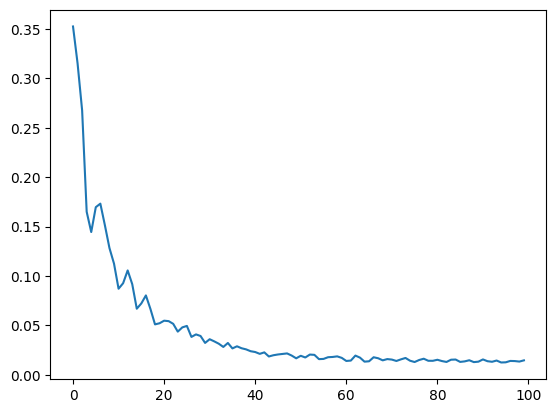

In [207]:
plt.plot(loss_history)

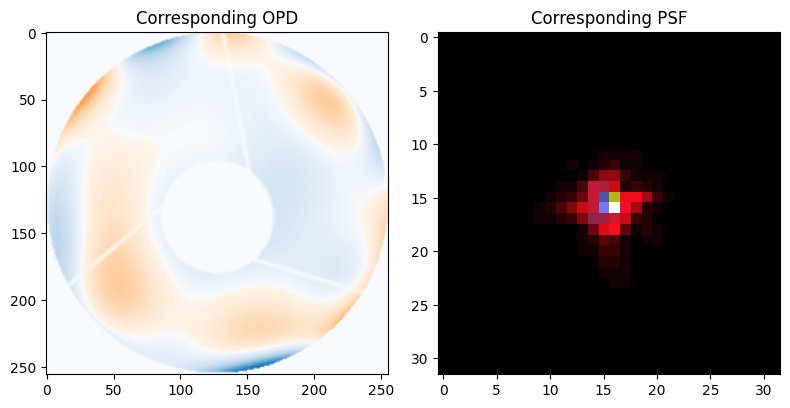

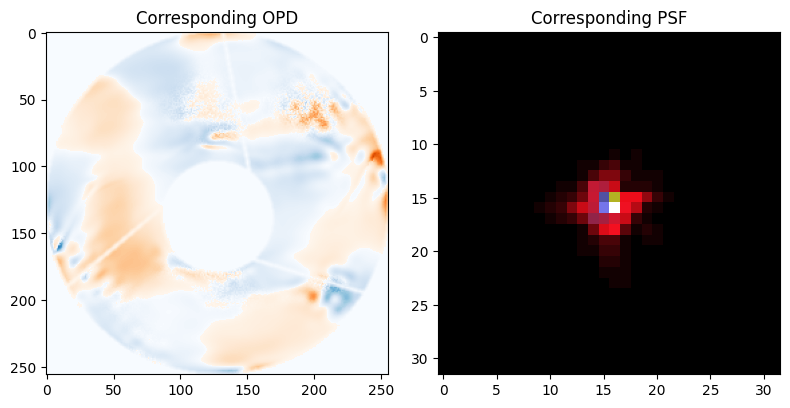

109.29340124130249


In [208]:
opd_gt, psf_gt = opd_psf(tf.convert_to_tensor(np.reshape(star_cat['zernike_coef'][star_target_idx], (1, nz, 1, 1) )), star_target_idx)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(opd_gt[0]*obscurations, cmap=newcmp, vmin=-0.5, vmax=0.5)
plt.title('Corresponding OPD')
plt.subplot(1,2,2)
# plt.imshow(psf_gt[0], cmap='gist_stern')
plt.imshow(psf_gt[0], cmap='gist_stern')
plt.title('Corresponding PSF')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(opd_pred[0]*obscurations, cmap=newcmp, vmin=-0.5, vmax=0.5)
plt.title('Corresponding OPD')
plt.subplot(1,2,2)
plt.imshow(psf_pred[0], cmap='gist_stern')
plt.title('Corresponding PSF')
plt.tight_layout()
plt.show()

print(opd_rmse(opd_gt, opd_pred, obscurations).numpy() * 100)

# OPD optimisation projection based

In [209]:
from wf_psf.utils.utils import decompose_tf_obscured_opd_basis

In [210]:
z_param =tf.convert_to_tensor(decompose_tf_obscured_opd_basis(opd_pred, tf_obscurations, zk_maps, n_zernike=nz).reshape(1, nz, 1, 1), dtype=tf.float32)

In [211]:
opd_param, _ = opd_psf(z_param, star_target_idx)

In [217]:
n_iterations = 350
n_iter_proj = 100
star_target_idx = 188
nz = 45
wfe_rms = 1e-2
lr = 0.008

psf_gt = tf.convert_to_tensor(np.expand_dims(star_cat['stars'][star_target_idx], axis=0), dtype=tf.float32)

# Initialize variable and optimizer

random_init = tf.random_uniform_initializer(minval=-0.005, maxval=0.005)
opd_pred = tf.Variable(
    initial_value=random_init(shape=[1, args['pupil_diameter'], args['pupil_diameter']]),
    trainable=True,
    dtype=tf.float32,
)
z_param = tf.Variable(
    initial_value=tf.zeros(shape=[1, nz, 1, 1]),
    trainable=False,
    dtype=tf.float32,
)
# x = tf.Variable(np.random.randn(1,nz,1,1)*wfe_rms, dtype=tf.float32)
# x = tf.Variable(global_best, dtype=tf.float32)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
loss_history = []
opd_hist = []

for i in range(n_iterations):
    # Compute parametric contribution
    opd_param = psf_model.tf_zernike_OPD(z_param)
    with tf.GradientTape() as tape:
        psf_pred = forward_model_opd(opd_pred+opd_param)
        loss = loss_function(psf_gt, psf_pred)
    grads = tape.gradient(loss, [opd_pred])
    optimizer.apply_gradients(zip(grads, [opd_pred]))
    loss_history.append(loss.numpy())

    if (i+1) % n_iter_proj == 0:
        print("Projecting onto Zernike basis...")
        # Project onto Zernike basis
        z_param_delta = tf.convert_to_tensor(decompose_tf_obscured_opd_basis(opd_pred, tf_obscurations, zk_maps, n_zernike=nz).reshape(1, nz, 1, 1), dtype=tf.float32)
        z_param.assign(z_param + z_param_delta)
        # Reset non-parametric component with random init
        opd_pred.assign(random_init(shape=[1, args['pupil_diameter'], args['pupil_diameter']]))

    opd_hist.append((opd_pred.numpy()+opd_param.numpy())[0])

    print(f"Iteration {i}, Loss: {loss.numpy():.6f}")

Iteration 0, Loss: 0.352578
Iteration 1, Loss: 0.310396
Iteration 2, Loss: 0.287246
Iteration 3, Loss: 0.283111
Iteration 4, Loss: 0.280518
Iteration 5, Loss: 0.268421
Iteration 6, Loss: 0.246860
Iteration 7, Loss: 0.219641
Iteration 8, Loss: 0.191252
Iteration 9, Loss: 0.165981
Iteration 10, Loss: 0.146604
Iteration 11, Loss: 0.133190
Iteration 12, Loss: 0.124964
Iteration 13, Loss: 0.121534
Iteration 14, Loss: 0.120460
Iteration 15, Loss: 0.118596
Iteration 16, Loss: 0.114750
Iteration 17, Loss: 0.109296
Iteration 18, Loss: 0.103057
Iteration 19, Loss: 0.096610
Iteration 20, Loss: 0.089845
Iteration 21, Loss: 0.082085
Iteration 22, Loss: 0.073085
Iteration 23, Loss: 0.064324
Iteration 24, Loss: 0.059112
Iteration 25, Loss: 0.058944
Iteration 26, Loss: 0.060210
Iteration 27, Loss: 0.059018
Iteration 28, Loss: 0.054785
Iteration 29, Loss: 0.049630
Iteration 30, Loss: 0.046569
Iteration 31, Loss: 0.046289
Iteration 32, Loss: 0.046490
Iteration 33, Loss: 0.045227
Iteration 34, Loss: 0.04

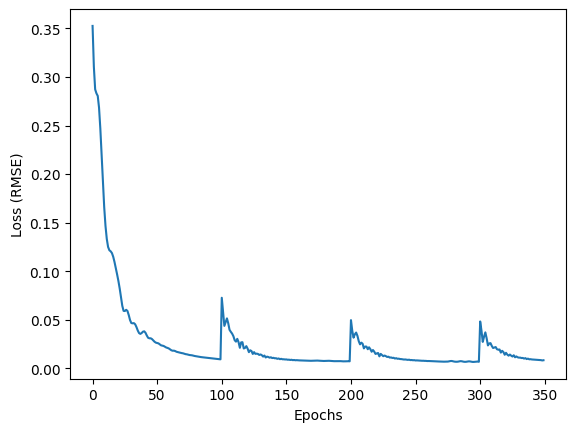

In [218]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')
plt.show()

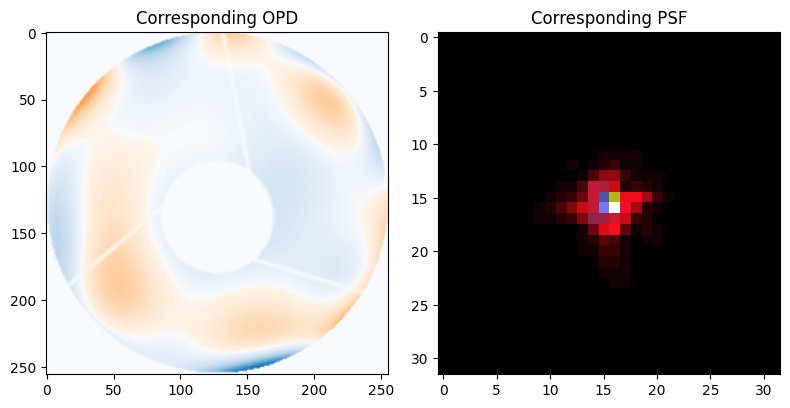

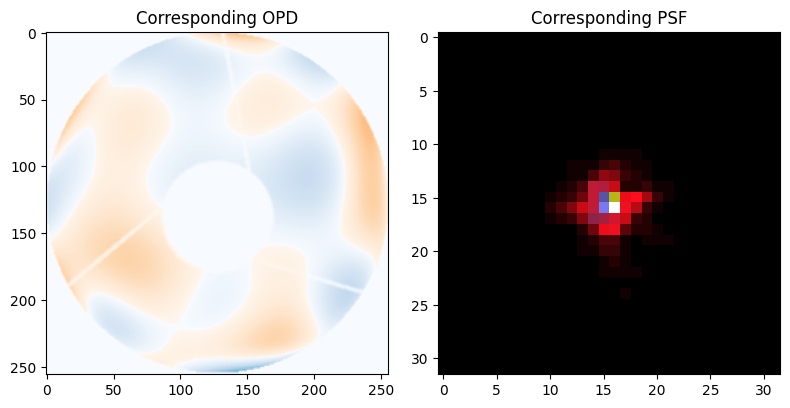

96.08447551727295


In [219]:
opd_gt, psf_gt = opd_psf(tf.convert_to_tensor(np.reshape(star_cat['zernike_coef'][star_target_idx], (1, nz, 1, 1) )), star_target_idx)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(opd_gt[0]*obscurations, cmap=newcmp, vmin=-0.5, vmax=0.5)
plt.title('Corresponding OPD')
plt.subplot(1,2,2)
# plt.imshow(psf_gt[0], cmap='gist_stern')
plt.imshow(psf_gt[0], cmap='gist_stern')
plt.title('Corresponding PSF')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(opd_param[0]*obscurations, cmap=newcmp, vmin=-0.5, vmax=0.5)
plt.title('Corresponding OPD')
plt.subplot(1,2,2)
plt.imshow(psf_pred[0], cmap='gist_stern')
plt.title('Corresponding PSF')
plt.tight_layout()
plt.show()

print(opd_rmse(opd_gt, opd_param, obscurations).numpy() * 100)

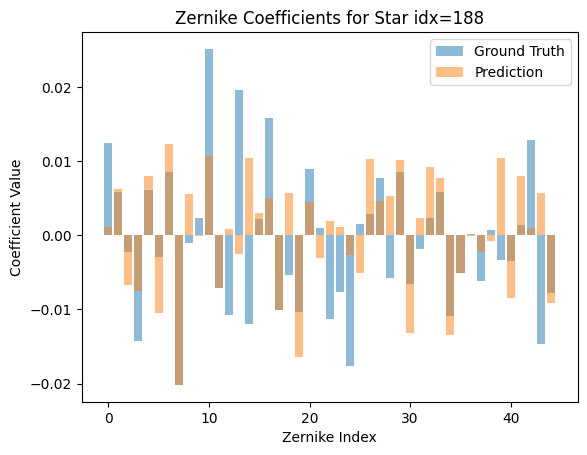

In [220]:
plt.bar(range(nz), star_cat['zernike_coef'][star_target_idx][:,0], label='Ground Truth', alpha=0.5)
plt.bar(range(nz), z_param[0,:,0,0], label='Prediction', alpha=0.5)
plt.legend()
plt.xlabel('Zernike Index')
plt.ylabel('Coefficient Value')
plt.title('Zernike Coefficients for Star idx={}'.format(star_target_idx))
plt.show()

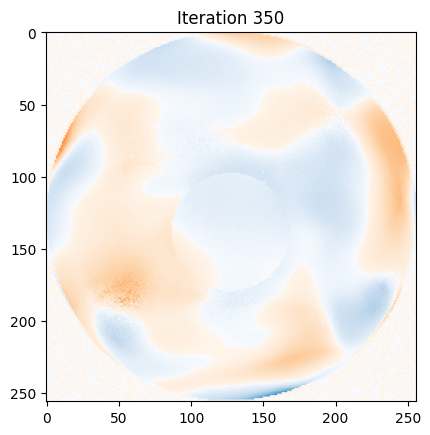

In [221]:
# Display OPD history as an animation
import matplotlib.animation as animation
fig, ax = plt.subplots()
im = ax.imshow(opd_hist[0], cmap=newcmp, vmin=-0.5, vmax=0.5)
ax.set_title('OPD Evolution')
def update(frame):
    im.set_array(opd_hist[frame])
    ax.set_title(f'Iteration {frame+1}')
    return [im]

ani = animation.FuncAnimation(fig, update, frames=len(opd_hist), blit=True)
ani.save('opd_evolution.gif', writer='imagemagick', fps=10)